In [1]:
import simtool as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d

c:\Users\Raph\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



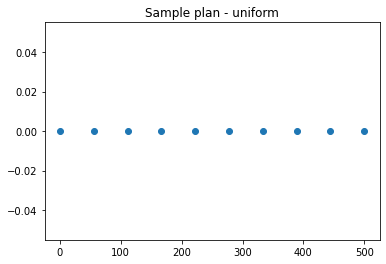

In [2]:
sample_plan1 = st.sample_plan(tmax=500, nbpoint=10, plan_type="uniform", batch_params=None)
sample_plan1.plot_samples()

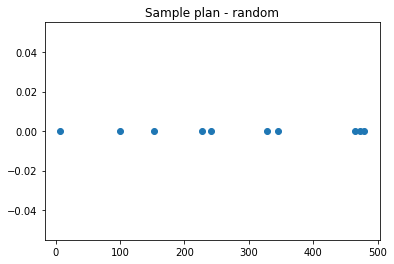

In [3]:
sample_plan2 = st.sample_plan(tmax=500, nbpoint=10, plan_type="random", batch_params=None)
sample_plan2.plot_samples()

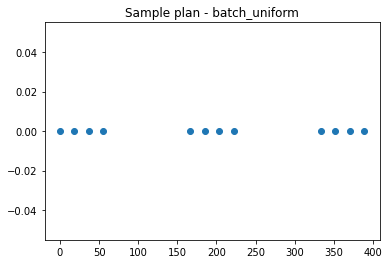

In [4]:
sample_plan3 = st.sample_plan(tmax=500, nbpoint=12, plan_type="batch_uniform", batch_params={"nbr_batch": 3, "ratio_in_out_batch": 1/3})
sample_plan3.plot_samples()

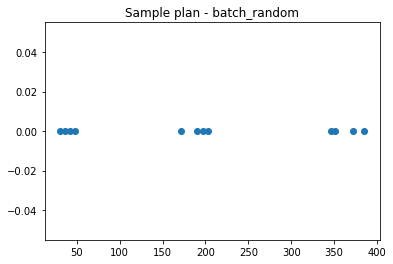

In [5]:
sample_plan4 = st.sample_plan(tmax=500, nbpoint=12, plan_type="batch_random", batch_params={"nbr_batch": 3, "ratio_in_out_batch": 1/3})
sample_plan4.plot_samples()

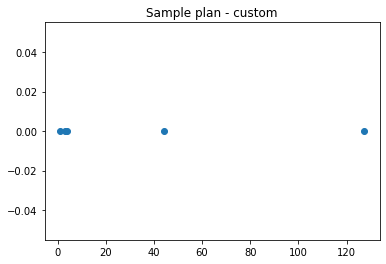

In [6]:
sample_plan5 = st.sample_plan(plan_type="custom", custom_plan=np.array(
        [1, 4, 127.34, 3, 44.21]
    ))
sample_plan5.plot_samples()

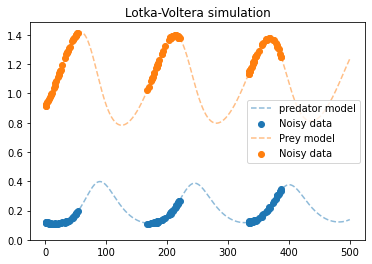

In [7]:
a1 , a2 , e , K , a = 0.088 , 0.020 , 0.96, 0.034, 0.086
params = [a1, a2, e, K, a]
param_names = ["a1", "a2", "e", "K", "a"]
t_max = 500 #days
x0, y0 = 0.12, 0.91
state_0 = [x0, y0]
data = st.data_gen(params, t_max, state_0, func_rep = 'holling1')
nbpoint = 120
noise_intensity = 0.003
noise_seed = 123

plan1 = st.sample_plan(tmax=data.tmax, nbpoint=nbpoint, plan_type="batch_random", 
                       batch_params={"nbr_batch": 3, "ratio_in_out_batch": 1/3})

data.get_data(nbpoint=nbpoint, noise_intensity=noise_intensity, plot_data=True,noise_seed = noise_seed,plan = plan1)


In [8]:
model = st.pinn(data)
model.get_train_data()
bc_weights = [5,5]
data_weights = [0.2,0.2] #car données tres bruitées
pde_weights = [10,10] #car données tres bruitées
poids_p1 = [0] * 2 + bc_weights + data_weights
poids_p2 = pde_weights + bc_weights + data_weights
poids = [poids_p1,poids_p2]
pfv_1 = 'train_architecture_1.dat'
lr = 1e-5

In [12]:
model.compile_model(lr=lr,nnlayers = [1] + [128] * 3 + [2],activation_function="swish",initcond = "Glorot normal",poids = poids,path_file_var = pfv_1,niter_p1=1000,niter_p2=5000)

Partie 1 de l'entrainement
Compiling model...
Building feed-forward neural network...
'build' took 0.202361 s



c:\Users\Raph\AppData\Local\Programs\Python\Python310\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.627473 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 2.33e+01, 3.81e+01]    [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 2.33e+01, 3.81e+01]    []  
1000      [0.00e+00, 0.00e+00, 4.02e-02, 2.30e+00, 3.35e-03, 1.85e-02]    [0.00e+00, 0.00e+00, 4.02e-02, 2.30e+00, 3.35e-03, 1.85e-02]    []  

Best model at step 1000:
  train loss: 2.36e+00
  test loss: 2.36e+00
  test metric: []

'train' took 18.545320 s

Partie 2 de l'entrainement
Compiling model...
'compile' took 1.181597 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1000      [9.05e-04, 1.91e-02, 4.02e-02, 2.30e+00, 3.35e-03, 1.85e-02]    [9.05e-04, 1.91e-02, 4.02e-02, 2.30e+00, 3.35e-03, 1.85e-02]    []  
2000      [4.16e-

L'entrainement a pris 1 minutes et 20 secondes


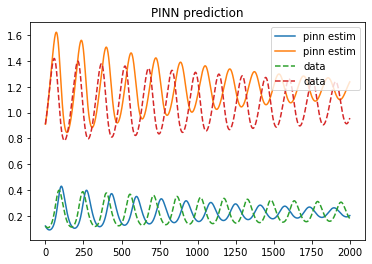

Evolution de la valeur des paramètres au cours de l'entrainement


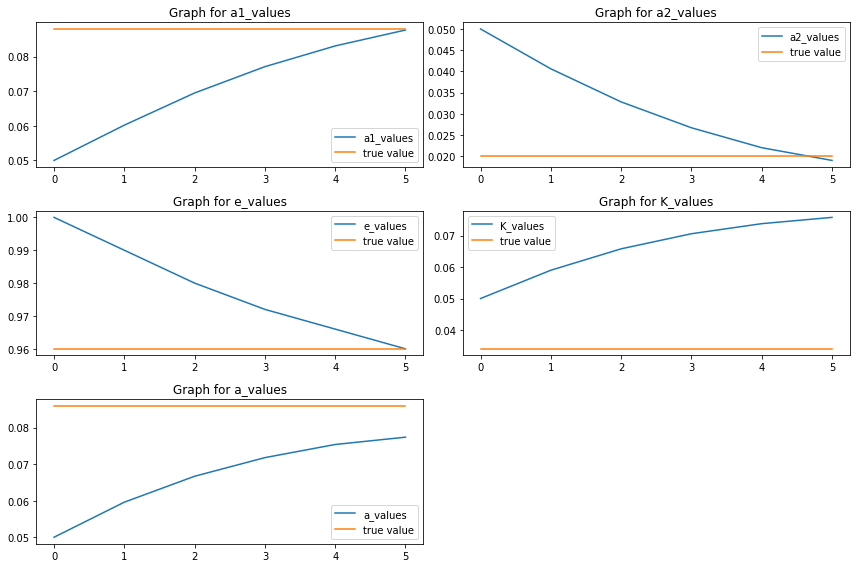

Pour un basic plot merci de train le modele a part


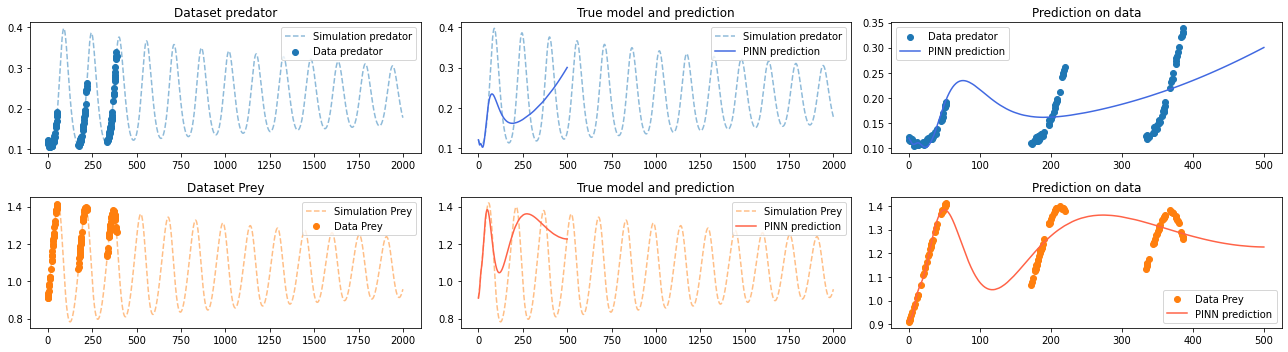

In [15]:
model.recap_train()
sp_model = st.model_scipy(data)
dp = st.displayer(model)
dp.plot_tlong(sp_model)
dp.plot_convergence()
dp.basic_plot()